# Processing the geojson data

# Install Dependencies-Do use VENV to protect your python 

Run by hand
```SHELL
    conda install -c conda-forge poppler
    pip install Pillow==9.0.0
    conda install -c conda-forge gdal rasterio geopandas geoplot
    conda install cartopy=0.21
    conda install matplotlib=3.5.2
```

## Import and Test

In [1]:
import matplotlib.pyplot as plt
import geoplot
import geoplot.crs as gcrs
import geopandas as gpd
from shapely.geometry import Point, shape
from shapely.validation import explain_validity
import pandas as pd
import sqlite3
from tqdm import tqdm
import concurrent.futures

merge nearby states

In [2]:
# List of GeoJSON file paths
geojson_files = [
    "SC_counties.geojson",
    "TN_counties.geojson",
    "VA_counties.geojson",
    "GA_counties.geojson"
]

geodataframes = []

for file in geojson_files:
    gdf = gpd.read_file(file)
    geodataframes.append(gdf)

merged_gdf = gpd.GeoDataFrame(pd.concat(geodataframes, ignore_index=True))

merged_gdf = merged_gdf.to_crs("EPSG:4326")  

merged_gdf.to_file("merged_output.geojson", driver="GeoJSON")


In [3]:
geo_NC = gpd.read_file(
    "NC_counties.geojson"
)
geo_nearby = gpd.read_file("merged_output.geojson")

Text(0.5, 1.0, 'NC nearby')

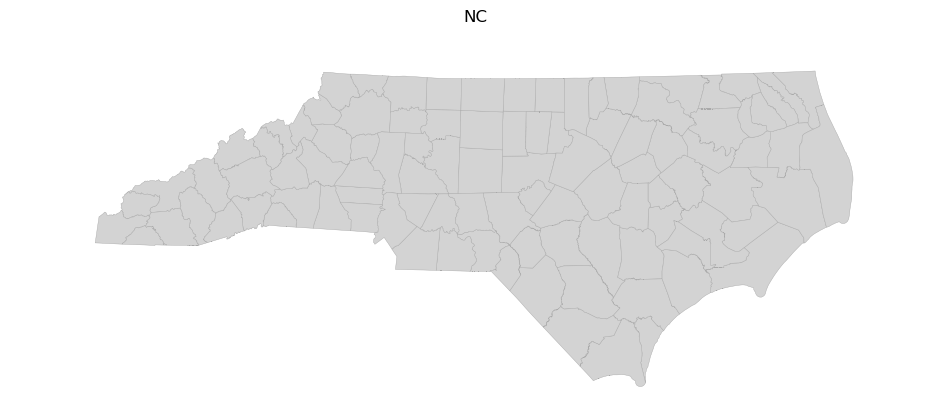

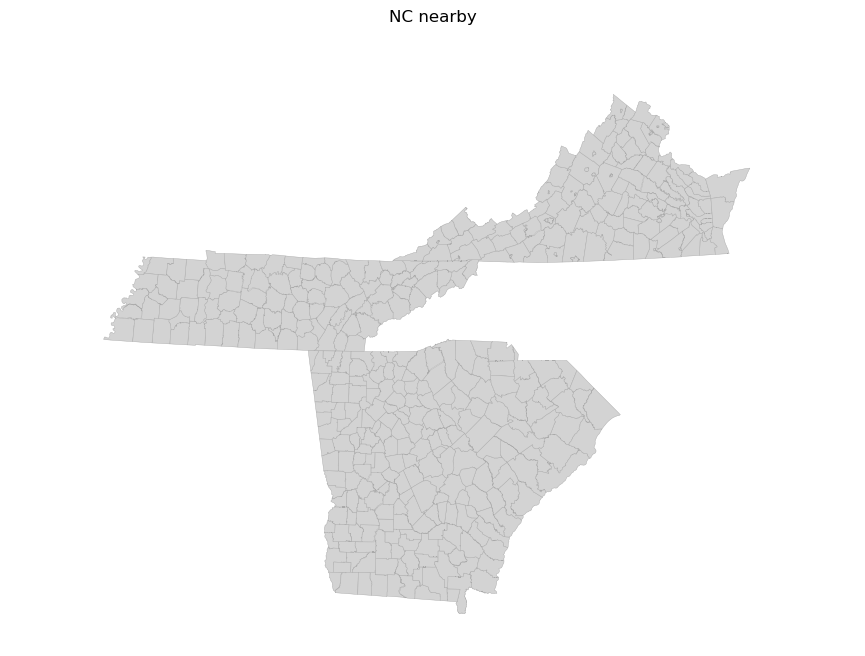

In [5]:
geoplot.polyplot(
    geo_NC,
    projection=gcrs.AlbersEqualArea(),
    edgecolor='darkgrey',
    facecolor='lightgrey',
    linewidth=.3,
    figsize=(12, 8)
)
plt.title("NC")
geoplot.polyplot(
    geo_nearby,
    projection=gcrs.AlbersEqualArea(),
    edgecolor='darkgrey',
    facecolor='lightgrey',
    linewidth=.3,
    figsize=(12, 8)
)
plt.title("NC nearby")

In [6]:
geo_NC

,STATEFP,COUNTYFP,COUNTYNS,GEOID,GEOIDFQ,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,37,037,01008544,37037,0500000US37037,Chatham,Chatham County,06,H1,G4020,450,20500,None,A,1765028677,70582736,+35.7049939,-079.2514542,"POLYGON ((-79.24113 35.57054, -79.24138 35.570..."
1,37,001,01008531,37001,0500000US37001,Alamance,Alamance County,06,H1,G4020,268,15500,None,A,1096742604,27933991,+36.0439535,-079.4005733,"POLYGON ((-79.26824 35.90918, -79.26791 35.909..."
2,37,057,01008548,37057,0500000US37057,Davidson,Davidson County,06,H1,G4020,268,49180,None,A,1432725178,37607387,+35.7951312,-080.2071070,"POLYGON ((-80.39431 35.97276, -80.39417 35.972..."
3,37,069,01008553,37069,0500000US37069,Franklin,Franklin County,06,H1,G4020,450,39580,None,A,1273761680,7173998,+36.0882406,-078.2830903,"POLYGON ((-78.12969 36.23955, -78.12958 36.239..."
4,37,155,01026130,37155,0500000US37155,Robeson,Robeson County,06,H1,G4020,246,31300,None,A,2453481926,5076395,+34.6392096,-079.1008811,"POLYGON ((-79.12835 34.88294, -79.12795 34.883..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,37,175,01008589,37175,0500000US37175,Transylvania,Transylvania County,06,H1,G4020,120,14820,None,A,979943598,5091023,+35.2101025,-082.8166660,"POLYGON ((-82.79776 35.36129, -82.79772 35.361..."
96,37,171,01008587,37171,0500000US37171,Surry,Surry County,06,H1,G4020,268,34340,None,A,1379541810,10392706,+36.4154160,-080.6864631,"POLYGON ((-80.44603 36.45461, -80.44639 36.448..."
97,37,043,01008546,37043,0500000US37043,Clay,Clay County,06,H1,G4020,None,None,None,A,556849483,15046554,+35.0529971,-083.7522638,"POLYGON ((-83.86551 35.12734, -83.86540 35.127..."
98,37,055,01026133,37055,0500000US37055,Dare,Dare County,06,H1,G4020,545,28620,None,A,992558551,3000513281,+35.6062688,-075.7675364,"POLYGON ((-75.81311 36.22356, -75.79310 36.227..."


In [7]:
geo_nearby

,STATEFP,COUNTYFP,COUNTYNS,GEOID,GEOIDFQ,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,45,023,01247988,45023,0500000US45023,Chester,Chester County,06,H1,G4020,172,16740,None,A,1503905790,14249301,+34.6893424,-081.1612488,"POLYGON ((-80.88649 34.65705, -80.88647 34.656..."
1,45,081,01248016,45081,0500000US45081,Saluda,Saluda County,06,H1,G4020,192,17900,None,A,1172510653,23102147,+34.0052784,-081.7279033,"POLYGON ((-81.54559 34.09100, -81.54436 34.087..."
2,45,089,01248018,45089,0500000US45089,Williamsburg,Williamsburg County,06,H1,G4020,None,None,None,A,2419477550,7461492,+33.6264617,-079.7164740,"POLYGON ((-79.67864 33.81408, -79.67840 33.814..."
3,45,035,01247998,45035,0500000US45035,Dorchester,Dorchester County,06,H1,G4020,None,16700,None,A,1472172215,6781942,+33.0821859,-080.4046966,"POLYGON ((-80.61290 33.27585, -80.61221 33.276..."
4,45,015,01247985,45015,0500000US45015,Berkeley,Berkeley County,06,H1,G4020,None,16700,None,A,2858661511,337919154,+33.2077000,-079.9536554,"POLYGON ((-79.75638 33.33018, -79.75640 33.330..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428,13,127,01671513,13127,0500000US13127,Glynn,Glynn County,06,H1,G4020,None,15260,None,A,1086851549,429106784,+31.2127098,-081.4964503,"POLYGON ((-81.40153 31.29518, -81.40127 31.295..."
429,13,009,00345255,13009,0500000US13009,Baldwin,Baldwin County,06,H1,G4020,None,33300,None,A,670028055,24803189,+33.0594897,-083.2554566,"POLYGON ((-83.42906 33.18530, -83.42902 33.185..."
430,13,111,00351094,13111,0500000US13111,Fannin,Fannin County,06,H1,G4020,None,None,None,A,1002597521,13473582,+34.8665427,-084.3173308,"POLYGON ((-84.26106 34.98845, -84.26048 34.988..."
431,13,177,00343390,13177,0500000US13177,Lee,Lee County,06,H1,G4020,None,10500,None,A,921632944,15408829,+31.8184185,-084.1466814,"MULTIPOLYGON (((-84.31432 31.69115, -84.31386 ..."


use business data

In [3]:
conn = sqlite3.connect("./NCCP.db")
cur = conn.cursor()

In [9]:
bus_df = pd.read_csv("extracted_data_with_coordinates.csv")
bus_df

,Company Name,Physical Address,Phone,FAX,Web,Business Description,NAICS,Employee(s),Annual Sales,Contact Person,Industry Description,Stock Exchange,Latitude,Longitude
0,#1AutoSalesLLC,"808NRaleighStGreensboro,NC27405-7324",3365008877,NaN,NaN,Automobile/TrucksDealers-Used,441120,2.0,"$881,000",NaN,UsedCarDealers,NaN,36.080536,-79.758096
1,#1Construction,"6AlbanyDrHampton,VA23666-3616",7577594513,NaN,1CONSTRUCTION.BUSINESS.SITE,GeneralContractors,236115,1.0,"$315,000",BryanNorrie,NewSingle-FamilyHousingConstruction(exceptFor-...,NaN,37.033295,-76.435401
2,#1HamptonRoadsCleaningSvc,"VirginiaBeach,VA23462-",7578289160,NaN,HAMPTONROADSCLEANI.WIXSITE.COM,JanitorService,561720,2.0,"$118,000",TywandaMiczell,JanitorialServices,NaN,NaN,NaN
3,#1InvestmentsLLC,"3900MertonDr#150Raleigh,NC27609-6619",9190001111,NaN,NaN,Investments,523910,3.0,"$1,779,000",AnthonyPickett,MiscellaneousIntermediation,NaN,35.829994,-78.631219
4,#1LaTruckingLLC,"6924ThorncliffDrCharlotte,NC28210-6527",7040001111,NaN,NaN,Trucking,484230,2.0,"$485,000",KenKLa,"SpecializedFreight(exceptUsedGoods)Trucking,Lo...",NaN,35.135778,-80.870764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62195,1Man&AFlatbedSemiTruck,"1621AmberRidgeLnRaleigh,NC27607-5081",9194417374,NaN,NaN,NonclassifiedEstablishments,999990,NaN,NaN,NaN,NaN,NaN,35.803784,-78.733243
62196,1Mark,"8CarteeAveGreenville,SC29605-4804",8646033006,NaN,NaN,MarkingDevices(mfrs),339940,15.0,"$793,000",NaN,OfficeSupplies(exceptPaper)Manufacturing,NaN,34.793839,-82.422516
62197,1Mdss/Sgslm/LangleyAFB,"73CherrySt#272LangleyAfb,VA23665-2017",7570001111,NaN,NaN,EducationCenters,611710,4.0,NaN,NaN,EducationalSupportServices,NaN,37.074920,-76.358700
62198,1MillionSolutionsLLC,"1223EaglewoodDrVirginiaBeach,VA23454-5656",7570001111,NaN,NaN,Accounting&BookkeepingGeneralSvc,541219,2.0,"$179,000",NaN,OtherAccountingServices,NaN,36.790297,-76.002343


In [10]:
def find_county(lon, lat):
    point = Point(lon, lat)
    for _, county in geo_NC.iterrows():
        if county['geometry'].contains(point):
            return county.get('NAME')
    for _, county in geo_nearby.iterrows():
        if county['geometry'].contains(point):
            return f"NOT_NC:{county.get('NAME')}"
    return "NOT_FOUND"

In [11]:
res = []
for _, company in bus_df.iloc[:100,:].iterrows():
    company = company.to_dict()
    lat = company["Latitude"]
    lon = company["Longitude"]
    company.update({"County":find_county(lon, lat)})
    res.append(company)
pd.DataFrame(res)

,Company Name,Physical Address,Phone,FAX,Web,Business Description,NAICS,Employee(s),Annual Sales,Contact Person,Industry Description,Stock Exchange,Latitude,Longitude,County
0,#1AutoSalesLLC,"808NRaleighStGreensboro,NC27405-7324",3365008877,NaN,NaN,Automobile/TrucksDealers-Used,441120,2.0,"$881,000",NaN,UsedCarDealers,NaN,36.080536,-79.758096,Guilford
1,#1Construction,"6AlbanyDrHampton,VA23666-3616",7577594513,NaN,1CONSTRUCTION.BUSINESS.SITE,GeneralContractors,236115,1.0,"$315,000",BryanNorrie,NewSingle-FamilyHousingConstruction(exceptFor-...,NaN,37.033295,-76.435401,NOT_NC:Hampton
2,#1HamptonRoadsCleaningSvc,"VirginiaBeach,VA23462-",7578289160,NaN,HAMPTONROADSCLEANI.WIXSITE.COM,JanitorService,561720,2.0,"$118,000",TywandaMiczell,JanitorialServices,NaN,NaN,NaN,NOT_FOUND
3,#1InvestmentsLLC,"3900MertonDr#150Raleigh,NC27609-6619",9190001111,NaN,NaN,Investments,523910,3.0,"$1,779,000",AnthonyPickett,MiscellaneousIntermediation,NaN,35.829994,-78.631219,Wake
4,#1LaTruckingLLC,"6924ThorncliffDrCharlotte,NC28210-6527",7040001111,NaN,NaN,Trucking,484230,2.0,"$485,000",KenKLa,"SpecializedFreight(exceptUsedGoods)Trucking,Lo...",NaN,35.135778,-80.870764,Mecklenburg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1Man&AFlatbedSemiTruck,"1621AmberRidgeLnRaleigh,NC27607-5081",9194417374,NaN,NaN,NonclassifiedEstablishments,999990,NaN,NaN,NaN,NaN,NaN,35.803784,-78.733243,Wake
96,1Mark,"8CarteeAveGreenville,SC29605-4804",8646033006,NaN,NaN,MarkingDevices(mfrs),339940,15.0,"$793,000",NaN,OfficeSupplies(exceptPaper)Manufacturing,NaN,34.793839,-82.422516,NOT_NC:Greenville
97,1Mdss/Sgslm/LangleyAFB,"73CherrySt#272LangleyAfb,VA23665-2017",7570001111,NaN,NaN,EducationCenters,611710,4.0,NaN,NaN,EducationalSupportServices,NaN,37.074920,-76.358700,NOT_NC:Hampton
98,1MillionSolutionsLLC,"1223EaglewoodDrVirginiaBeach,VA23454-5656",7570001111,NaN,NaN,Accounting&BookkeepingGeneralSvc,541219,2.0,"$179,000",NaN,OtherAccountingServices,NaN,36.790297,-76.002343,NOT_NC:Virginia Beach


## Test Successful, Now perform calculation async

In [12]:
import os
os.popen("python3 calculateCounty.py").read()

100%|██████████| 62200/62200 [00:23<00:00, 2592.21it/s]  


'       Company Name  ...                 County\n0    @workPersonnel  ...            NOT_NC:Knox\n1  057TechnologyLLC  ...                Catawba\n2      1800FixHomes  ...  NOT_NC:Virginia Beach\n3      #1TestingInc  ...                  Wayne\n4      #wearethe828  ...               Buncombe\n\n[5 rows x 15 columns]\n'

In [4]:
updated_bus_df=pd.read_csv("processed_results.csv")
updated_bus_df.to_sql("Business", conn, if_exists="replace", index=False)

62200

In [8]:

counties = [
    "Alexander", "Alleghany", "Ashe", "Avery", "Buncombe", "Burke",
    "Caldwell", "Catawba", "Clay", "Cleveland", "Gaston", "Haywood",
    "Henderson", "Jackson", "Lincoln", "Macon", "Madison", "McDowell",
    "Mecklenburg", "Mitchell", "Polk", "Rutherford", "Swain",
    "Transylvania", "Watauga", "Wilkes", "Yancey"
]

# Convert counties list into a string formatted for the SQL query
counties_str = "', '".join(counties)  # Join with single quotes and commas
query = f"SELECT * FROM Business WHERE County IN ('{counties_str}')"

# Execute the query using pandas
df = pd.read_sql(query, conn)


In [9]:
df

,Company Name,Physical Address,Phone,FAX,Web,Business Description,NAICS,Employee(s),Annual Sales,Contact Person,Industry Description,Stock Exchange,Latitude,Longitude,County
0,057TechnologyLLC,"1115DaisyLnHickory,NC28602-9539",8280001111,NaN,None,NonclassifiedEstablishments,999990,NaN,None,JasonDHughes,None,None,35.655272,-81.331807,Catawba
1,#wearethe828,"Asheville,NC28806-",8282599695,NaN,WEARETHE828.COM,NonclassifiedEstablishments,999990,NaN,None,None,None,None,35.579545,-82.626087,Buncombe
2,#1TruckingLLC,"2401WesterlyHillsDrCharlotte,NC28208-4846",7040001111,NaN,None,Trucking,484230,2.0,"$485,000",GloriaJWilliams,"SpecializedFreight(exceptUsedGoods)Trucking,Lo...",None,35.228265,-80.897241,Mecklenburg
3,#missionPostAlpacas,"4454CoveRdUnionMills,NC28167-8634",8284360505,NaN,None,Fiber&FiberProducts(mfrs),322219,1.0,"$164,000",LynnRucki,OtherPaperboardContainerManufacturing,None,35.515559,-82.089206,Rutherford
4,#1LaTruckingLLC,"6924ThorncliffDrCharlotte,NC28210-6527",7040001111,NaN,None,Trucking,484230,2.0,"$485,000",KenKLa,"SpecializedFreight(exceptUsedGoods)Trucking,Lo...",None,35.135778,-80.870764,Mecklenburg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11191,1DIN3TransportLLC,"10PheasantRidgeRdFairview,NC28730-8508",8280001111,NaN,None,Trucking,484230,2.0,"$374,000",DumitruGyska,"SpecializedFreight(exceptUsedGoods)Trucking,Lo...",None,35.514008,-82.397399,Buncombe
11192,1LoveCorp,"11212AmberGlenDrCharlotte,NC28269-5162",7040001111,NaN,None,NonclassifiedEstablishments,999990,NaN,None,BernelBerry,None,None,35.365563,-80.805770,Mecklenburg
11193,1DollarFlooringLLC,"3241BridleStoneCtCharlotte,NC28273-7829",7049573339,NaN,None,FloorLayingRefinishing&Resurfacing,238330,2.0,"$293,000",None,FlooringContractors,None,35.144382,-80.949699,Mecklenburg
11194,1KGMCapitalInc,"2201LudlowDrCharlotte,NC28216-4226",7040001111,NaN,None,MiscNon-DurableGoodsNEC(whls),425120,3.0,"$2,632,000",MichaelThomas,WholesaleTradeAgentsandBrokers,None,35.266528,-80.864172,Mecklenburg
